In [1]:
%pylab inline
from scipy.optimize import minimize_scalar

Populating the interactive namespace from numpy and matplotlib


In [2]:
def ent(p, base = 2.):
    r"""Takes as input a 1-d numpy array and base, returns the Shannon entropy 
    in given base. 
    
    Parameters
    ----------
    p : numpy array
        1-d array 
    
    base : float
           Base for the log
    
    Returns
    ----------
    ent : float
          :math: '-\sum_i p_i*\log_b p_i'
    
    Notes
    ----------
    If any of entry in the input is negative it throws an error.
    """
    
    if any(p<0.):
        raise ValueError('In ent not all arguments positive')
    
    x = p[p>0.]
    
    ent = -np.dot(x, np.log(x))/np.log(base)
    return ent

In [3]:
def enDiffB(w,s):
    r"""Takes as input the parameters s and w, where w represents
    an eigenvalue of the input density operator for channel 1, s
    a parameter in channel 1. Returns the entropy difference
    for channel 1
    
    Parameters
    ----------
    w : float

    s : float
    
    Returns
    ----------
    diff : float
           entropy difference S(C) - S(B)
    """
    eigB = np.array([w,s*(1-w),(1-s)*(1-w)])
    eigC = np.array([s*(1-w),1-s*(1-w)])
    SB = ent(eigB)
    SC = ent(eigC)
    diff = SC - SB
    return diff
    

In [4]:
def q1B(s):
    r"""Takes as input the parameters s defining channel 1. 
    Returns the maximum entropy difference and the
    eigenvalue w that optimized the entropy difference
    
    Parameters
    ----------    
    w : float
    
    Returns
    ----------
    q1 : float
         maximum coherent information of channel 1
    
    wStar : float
            eigenvalue w in the optimizing density operator
            (1-w)[0] + w[1]
    """
    res = minimize_scalar(enDiffB, bounds=(0, 1), args=(s,),method='bounded') 
    
    (q1,wStar) =  (-1.*res.fun,res.x)
    return (q1,wStar)

In [5]:
def pBar(s):
    r"""Takes as input the parameter s for channel 1
    and returns the parameter 1/2 <= p <= 1 for channel 2 below
    which the b output has a stronger log-singularity than the
    c output
    
    Parameters
    ----------
    s : float
    
    Returns
    ----------
    pSt : float
    """
    (q1,w) = q1B(s)
    kVal = (1-s)*(1-w)
    kVal = kVal/(w + kVal)
    pBar = 1/(1+kVal)
    return pBar

In [6]:
sVal = []
pVal = []
for s in np.linspace(1e-10,.5,25):
    sVal += [s]
    pVal += [pBar(s)]

In [7]:
sVal = np.array(sVal)
pVal = np.array(pVal)


In [8]:
#Production quality plots
plt.style.use('default')
plt.rc('text',usetex=True)
plt.rc('lines', linewidth=1)


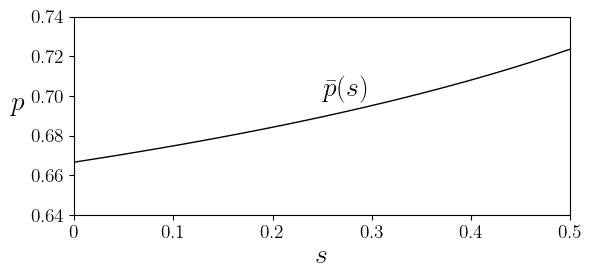

In [9]:
fntSz = 20
fntSz1 = 14
fig, ax1 = plt.subplots()

ax1.set_xlim(0,.5)
ax1.set_ylim(.64,.74)

ax1.set_ylabel(r'$p$',labelpad=10,size=fntSz,rotation='horizontal')
ax1.set_xlabel(r'$s$',labelpad=1,size=fntSz)

ax1.plot(sVal, pVal,c='k',label=r'$\bar p(s)$')
ax1.text(.25,.70,r'$\bar p(s)$',fontsize=fntSz)


ax1.tick_params(direction='out',top=0,right=0,labelsize=fntSz1)
ax1.tick_params(axis='y',labelright=0,labelleft=1)


ax1.set_xticks([0,1e-1,2e-1,3e-1,4e-1,5e-1])
ax1.set_xticklabels(['$0$','$0.1$', r'$0.2$', r'$0.3$', r'$0.4$', r'$0.5$'])


ax1.set_yticks([.64,.66,.68,.7,.72,.74])
ax1.set_yticklabels(['$0.64$','$0.66$', r'$0.68$', r'$0.70$', r'$0.72$', r'$0.74$'])

ax1.set_aspect(2)
savefig('FigD.pdf',dpi=400,bbox_inches='tight',transparent=True)